# Heat Flux from Single Barrel of WC814 Smokeless Powder

Test conducted by Safety Management Services,Inc. at TEAD on April 1, 2020 with one fiberboard barrel of 60 pounds of WC814. The fiberboard barrel is approximately 14 inches in diameter and 22.5 inches high. Heat flux was collected at 8, 15, 20, and 24 feet from the edge of the barrel. See details below. 

## Setup details

Pictures of the setup are below. Four heat flux sensors were setup at 8, 15, 20, and 24 feet from the edge of the barrel. The fiberboard drum is sitting on top of an empty upside-down metal barrel. The propellant grains are quite small. An electric match was used to ignite the propellant about 3/4 of an inch from the top. The lid was left off for the testing.

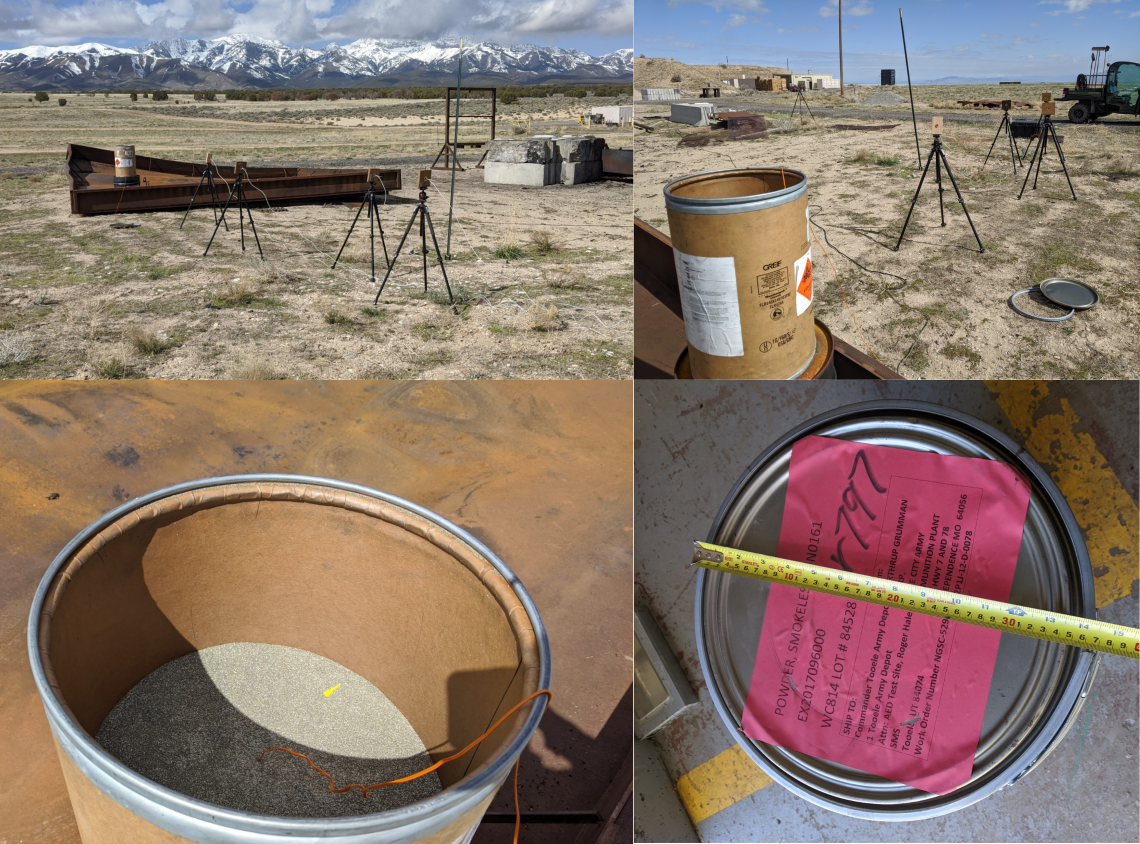

## Test Results

Import data

In [1]:
#import needed packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [2]:
data = pd.read_csv('jupyterfiles/6031/60lbWC814HFDODe.txt', sep='\t', header=7) 

In [3]:
data.rename(columns = {'AI B-1 (V)':'8ft','AI A-1 (V)':'15ft',
                       'AI A-4 (V)':'20ft','AI A-7 (V)':'24ft'}, inplace = True) 

In [4]:
convEngtoSI = 1.135365 #conversion of BTU/s/ft2 to W/cm2
#multiply data in volts by calibration values to yield W/cm2
data['8ft'] = data['8ft']*922.5*convEngtoSI #serial number 215503 #conversion from Volts to W/cm2
data['15ft'] = data['15ft']*44.21*convEngtoSI #S/N 161612
data['20ft'] = data['20ft']*50.86*convEngtoSI #S/N 161615
data['24ft'] = data['24ft']*50.92*convEngtoSI #S/N 203381

In [5]:
data.set_index(['Time (s)'],inplace=True)
data.head()

,15ft,20ft,24ft,8ft
Time (s),,,,
0.0000,0.007596,0.005317,0.007985,0.019740
0.0005,0.007102,0.004736,0.007323,0.020776
0.0010,0.007286,0.004873,0.007535,0.020776
0.0015,0.007129,0.004822,0.007455,0.020926
0.0020,0.006980,0.004621,0.007149,0.020314


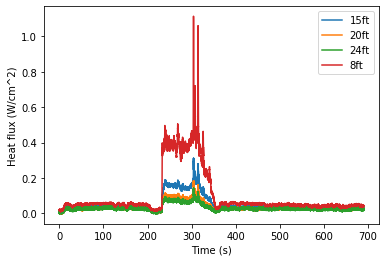

In [6]:
data.plot()
plt.ylabel('Heat flux (W/cm^2)')
plt.show()

## Video images

Below are images from the video from two different angles.  The left most images represent the typical flame behavior.  The right most images are of the larger fireball that yielded the highest peak in the heat flux plot. There was a slight wind in the direction away from the heat flux sensors. 

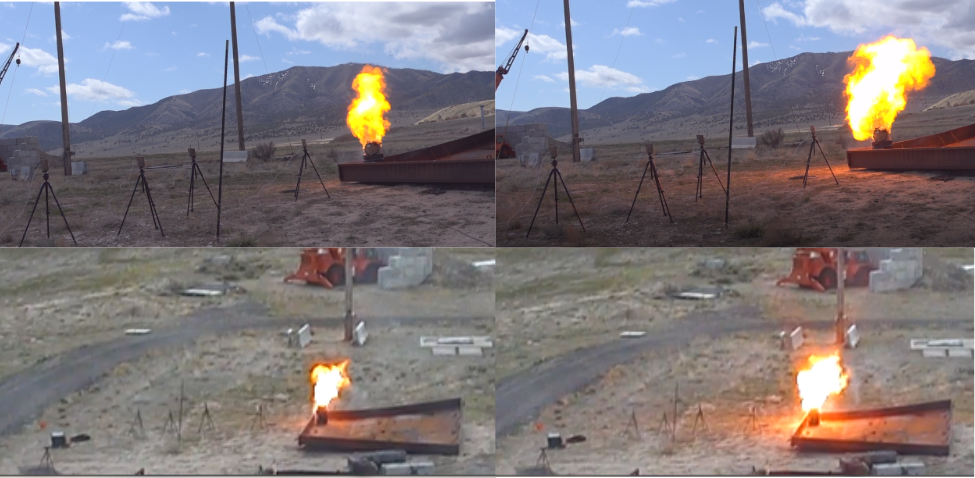

## Further data anlaysis

Trim the data to just the event

In [7]:
df = data[data.index>232];df2=df[df.index<352];df2.index = df2.index - 232

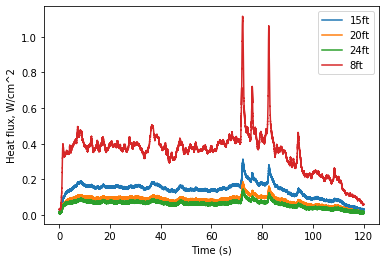

In [8]:
df2.plot()
plt.ylabel('Heat flux, W/cm^2')
plt.show()

In [9]:
df2.describe() #report basic statistics of the data frame

,15ft,20ft,24ft,8ft
count,239999.000000,239999.000000,239999.000000,239999.000000
mean,0.140277,0.083425,0.063153,0.351883
std,0.043826,0.026102,0.020034,0.123046
min,0.013636,0.008954,0.007163,0.029491
25%,0.122273,0.071497,0.053662,0.306336
50%,0.149398,0.089619,0.067604,0.372810
75%,0.163329,0.098861,0.075230,0.406696
max,0.312932,0.185208,0.145074,1.114396


Total energy released assuming consistant radiation at guage distance. Or in other words, assuming that the heat flux value measured at the gauge is the same on a spherical surface surrounding the barrel.

In [10]:
totalheat = [-integrate.trapz(df2.index,df2[column])*4*0.92903*np.pi*float(column[:-2])**2 
             for column in df2.columns] #integral yields J/cm2, factors and area yield units of kiloJoules

In [11]:
totalheat #kilojoules

[33599.42495294236, 37199.592839863915, 37030.83483657546, 26216.75066531107]

Approximate energy in kilojoules per gram from the integration of the heat flux data

In [12]:
kJpergramRadiated = np.max(totalheat)/(60*453.6)
kJpergramRadiated

1.3668280731872398

Fraction of total energy radiated (includes afterburning in the heat radiated but not in the heat of combustion of the NC)

In [13]:
kJpergramRadiated/9.5 #The heat of combustion of nitrocellulose is approximately 9.5 kJ/g
#https://nvlpubs.nist.gov/nistpubs/jres/44/jresv44n4p387_A1b.pdf

0.14387663928286734

Approximately 15% of the energy released by the burning of the propellant is radiated. This is in agreement with the 1992 BOM DDESB paper where they report a value of approximately 20%.

### Comparison of results to the Point Source Model

Point source factor based on the above heat flux data

In [14]:
maxhf = [np.max(df2[column]) for column in df2.columns]
meanhf = [np.average(df2[column]) for column in df2.columns]
distance = [float(column[:-2]) for column in df2.columns]

In [15]:
power = 1.75 #normal point source model, this is equal to 2.  A lower value means the heat flux
#doesn't drop off as fast at large distances.

In [16]:
apsm = np.average([maxhf[i]*4*np.pi*d**power for i,d in enumerate(distance)]) #point source factor for max
apsa = np.average([meanhf[i]*4*np.pi*d**power for i,d in enumerate(distance)]) #point source factor for mean

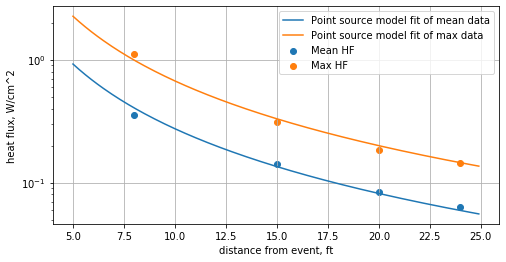

In [17]:
x = np.arange(5,25,0.1) #array of distances
ymax = apsm/(4*np.pi*x**power)
ymean = apsa/(4*np.pi*x**power)
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)
ax.semilogy(x,ymean,label='Point source model fit of mean data')
ax.scatter(distance,meanhf,label='Mean HF')
ax.semilogy(x,ymax,label='Point source model fit of max data')
ax.scatter(distance,maxhf,label='Max HF')
plt.grid()
plt.xlabel('distance from event, ft')
plt.ylabel('heat flux, W/cm^2')
plt.legend()
plt.show()

From the above plot, the point source model appears to fit the data well.